In [1]:
import torch
from torch import nn
from torchvision import datasets, transforms
import matplotlib.pylab as plt

from models.vit import ViT

In [2]:
class ClassifierViT(nn.Module):
    def __init__(self, dim: int, nclasses: int, **kwargs):
        super(ClassifierViT, self).__init__()
        
        self.vit = ViT(dim=dim, **kwargs)
        self.mlp_head = nn.Sequential(
            nn.LayerNorm(dim),
            nn.Linear(dim, nclasses)
        )
    
    def forward(self, x, **kwargs):
        out = self.vit(x, **kwargs)
        return self.mlp_head(out[:, 0])

In [3]:
batch_size = 128
image_size = 28
patch_size = 7
dim = 128
n_classes = 10
dropout = 0.1
depth = 2
nheads = 4
hid_dim = 512

In [4]:
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('dataset/',train = True,download = True,
                 transform = transforms.Compose([
                     transforms.ToTensor(),
                     transforms.Normalize(mean = (0.5,), std = (0.5,))
                 ])),
    batch_size = batch_size,
    shuffle = True)

In [5]:
model= ClassifierViT(
    nchannels = 1,
    img_size = image_size,
    patch_size = patch_size,
    dim = dim,
    nclasses = n_classes,
    dropout = dropout,
    depth = depth,
    nheads = nheads,
    hid_dim = hid_dim,
)
model_optim = torch.optim.Adam(model.parameters(), lr = 7e-4)

In [6]:
for i in range(3):
    for feature, label in iter(train_loader):
        out = model(feature)
        loss = nn.CrossEntropyLoss()(out, label)
        model_optim.zero_grad()
        loss.backward()
        model_optim.step()
    print(f"{i}: {loss.item()}")



0: 0.12032395601272583
1: 0.13104240596294403
2: 0.12109464406967163


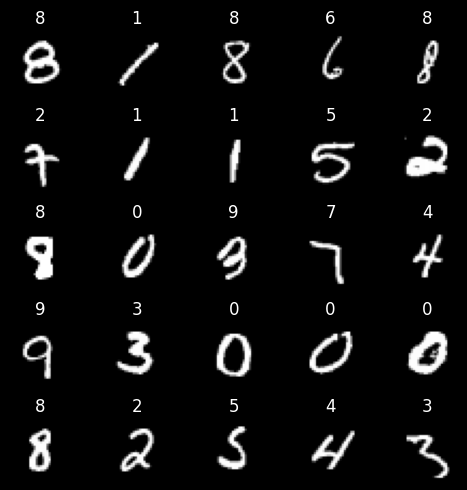

In [7]:
plt.figure(figsize=(5, 5)).set_facecolor('black')
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.title(out[i].argmax(-1).item(), color='white')
    plt.imshow(feature[i][0], cmap = plt.cm.gray)
    plt.xticks([])
    plt.yticks([])

plt.tight_layout()